## 3. Data Analysis and Modeling

### Import neccessary libraries

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

Read processed dataset

In [209]:
processed_df = pd.read_csv('data/processed_data.csv')
sns.set_style("whitegrid")
print(f"Number of games in processed_df: {processed_df.shape[0]}")

Number of games in processed_df: 18137


## **Question 1: How has user reception evolved on Steam over time?**

**What are the benefits of finding the answer?**
- Identify how user preferences and satisfaction have changed over the years. This can help developers and publishers understand what gamers valued in the past and what they expect now.
- By analyzing historical data, we can make informed predictions about future trends in user reception.
- Insights gained can then inform marketing strategies, game development priorities.


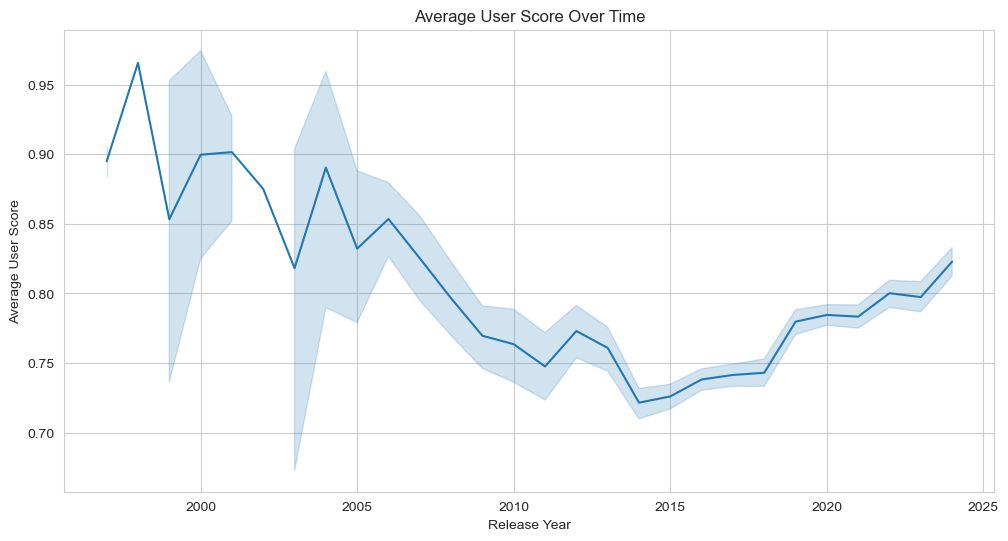

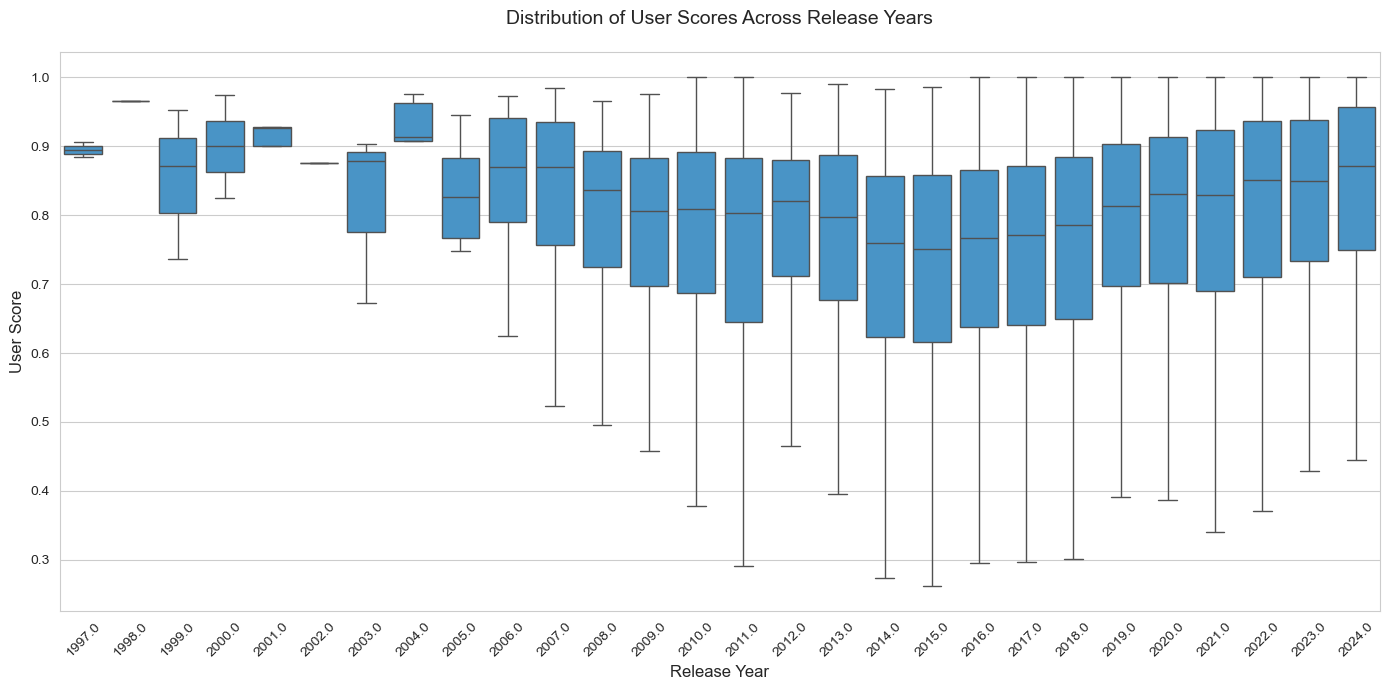

In [210]:
# Line plot of average userscore over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=processed_df, x='release_year', y='userscore')
plt.title('Average User Score Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average User Score')
plt.show()

# Box plots of userscore distribution for each year
plt.figure(figsize=(14, 7))
sns.boxplot(x='release_year', y='userscore', data=processed_df, color='#3498db', showfliers=False)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('User Score', fontsize=12)
plt.title('Distribution of User Scores Across Release Years', fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

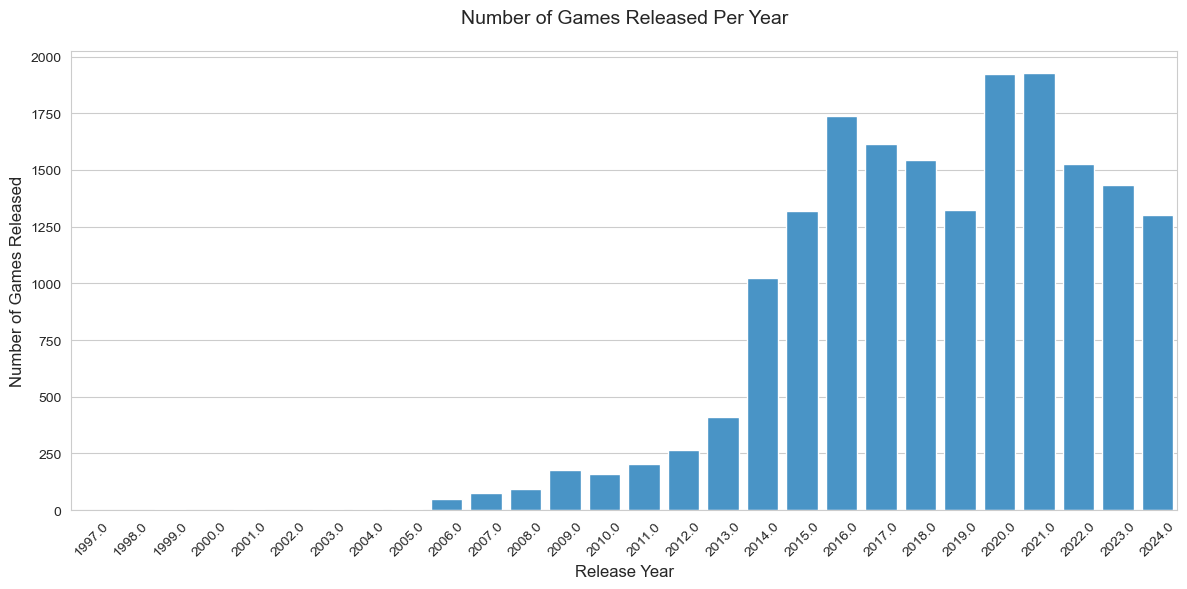

Correlation between number of games released and average user score: -0.59


In [211]:
# Calculate the number of games released per year
games_released_per_year = processed_df['release_year'].value_counts().sort_index()

# Create a bar plot of the number of games released per year
plt.figure(figsize=(12, 6))
sns.barplot(x=games_released_per_year.index, y=games_released_per_year.values, color='#3498db')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Games Released', fontsize=12)
plt.title('Number of Games Released Per Year', fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the correlation between the number of games released and average user score
correlation = games_released_per_year.corr(average_userscore_by_year)
print(f"Correlation between number of games released and average user score: {correlation:.2f}")

**Conclusions:**

*   The average user score has fluctuated over time. There is a noticeable dip in the early 2010s, followed by a gradual increase. However, the overall trend from 2000 to 2024 appears to be downward.
*   The distribution of user scores within each year (as seen in the box plots) varies. Some years have a wider spread, indicating more variability in user reception.
*   The number of games released per year has significantly increased, especially in recent years.
*   There is a moderate negative correlation (-0.59) between the number of games released and the average user score, suggesting that years with more game releases tend to have slightly lower average user scores. This could be due to a variety of factors, such as increased competition, a wider range of game quality, or changes in user expectations.

## **Question 2: Do mature-rated games tend to have different user scores compared to those with lower age ratings, and how does this intersect with various genres?**

**What are the benefits of finding the answer?**
- Understanding if certain age ratings are associated with higher or lower user scores within specific genres can help developers make informed decisions about their target audience and game design.
- Game publishers can tailor their marketing campaigns based on the age rating and genre preferences of their target audience.
- Analyzing the intersection of age ratings and genres provides a more nuanced understanding of player preferences. For example, are mature-rated Action games received differently than mature-rated Casual games?
- The findings can inform decisions about game content. If mature-rated games in a particular genre consistently receive lower scores, developers might need to reconsider their approach to mature content within that genre.


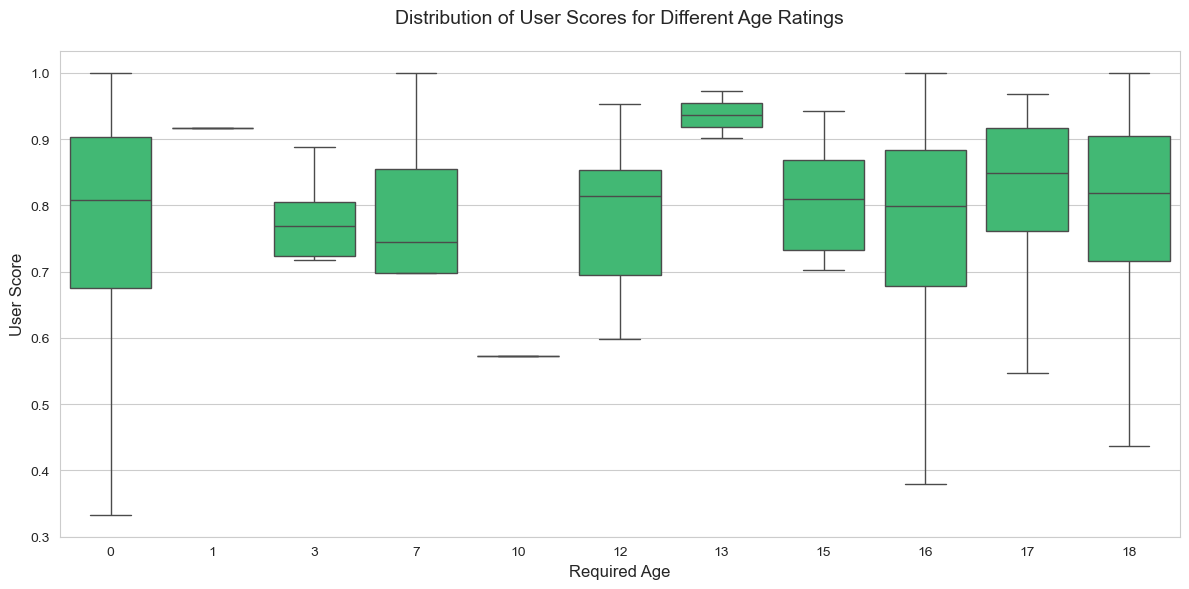

In [212]:
# Create box plots of user scores for each required_age category
plt.figure(figsize=(12, 6))
sns.boxplot(x='required_age', y='userscore', data=processed_df, color='#2ecc71', showfliers=False)
plt.xlabel('Required Age', fontsize=12)
plt.ylabel('User Score', fontsize=12)
plt.title('Distribution of User Scores for Different Age Ratings', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [213]:
# Get unique age categories and sort them
age_categories = sorted(processed_df['required_age'].unique())

# Create a dictionary to store t-test results
ttest_results = {}

# Perform t-tests between unique pairs of age categories
for i in range(len(age_categories)):
    for j in range(i + 1, len(age_categories)):
        group1 = processed_df[processed_df['required_age'] == age_categories[i]]['userscore']
        group2 = processed_df[processed_df['required_age'] == age_categories[j]]['userscore']

        # Perform t-test only if both groups have at least 2 samples
        if len(group1) >= 2 and len(group2) >= 2:
            t_statistic, p_value = ttest_ind(group1, group2)
            ttest_results[(age_categories[i], age_categories[j])] = {'t_statistic': t_statistic, 'p_value': p_value}

# Convert results to a DataFrame for better presentation
ttest_df = pd.DataFrame.from_dict(ttest_results, orient='index')
ttest_df.index.names = ['age_group1', 'age_group2']

# Add a column for statistical significance
ttest_df['significant'] = ttest_df['p_value'] < 0.05

# Display the results
print(ttest_df)


                       t_statistic   p_value  significant
age_group1 age_group2                                    
0          3              0.217634  0.827717        False
           7              0.341235  0.732930        False
           12             0.006341  0.994941        False
           13            -1.606631  0.108153        False
           15            -0.418888  0.675303        False
           16             0.315745  0.752200        False
           17            -1.519290  0.128707        False
           18            -1.660305  0.096871        False
3          7              0.113394  0.912207        False
           12            -0.294214  0.770155        False
           13            -2.753236  0.028371         True
           15            -0.630390  0.538594        False
           16            -0.163779  0.870150        False
           17            -1.062908  0.294902        False
           18            -0.598484  0.550136        False
7          12 

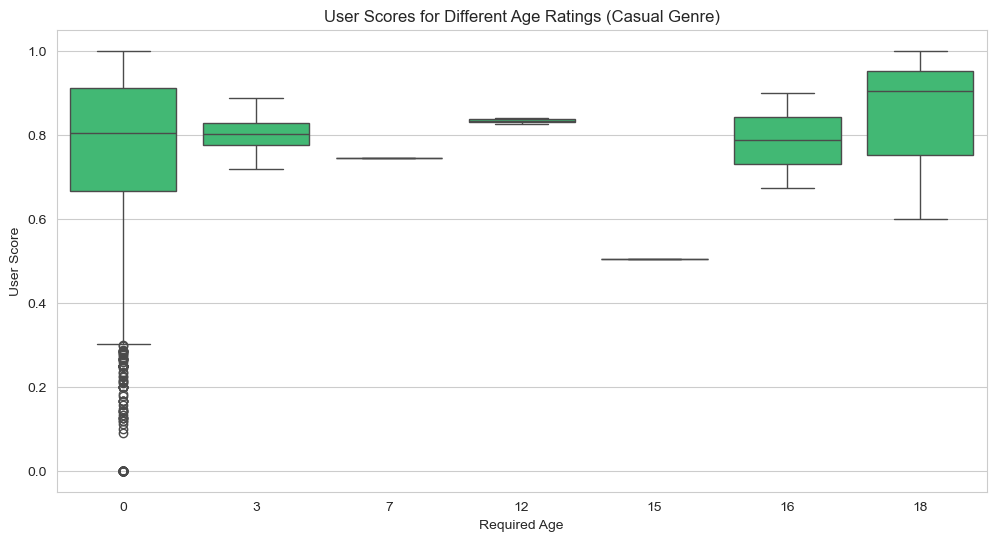

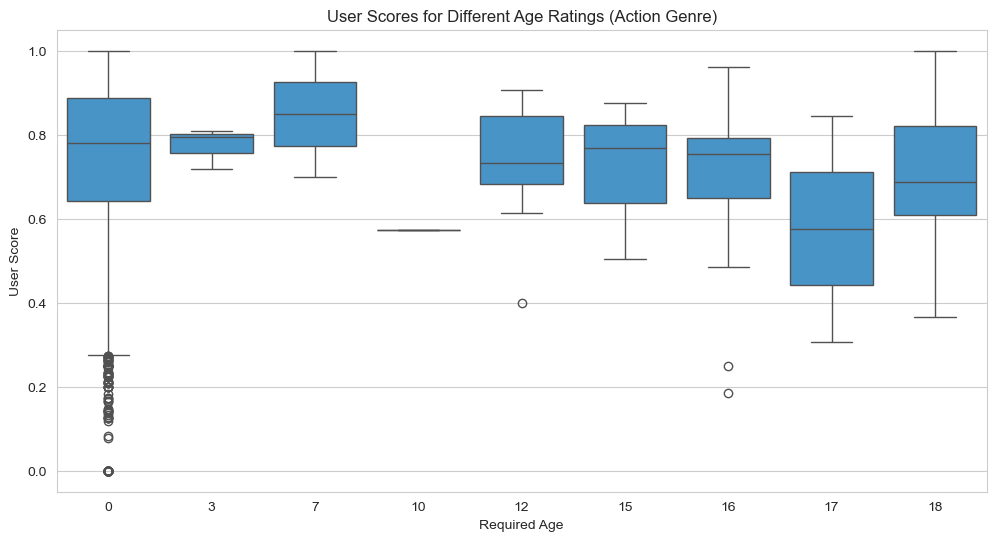

In [214]:
casual_df = processed_df[processed_df['genre_casual'] == 1]
action_df = processed_df[processed_df['genre_action'] == 1]

# 1. Casual Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='required_age', y='userscore', data=casual_df, color='#2ecc71')
plt.title('User Scores for Different Age Ratings (Casual Genre)')
plt.xlabel('Required Age')
plt.ylabel('User Score')
plt.show()

# 2. Action Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='required_age', y='userscore', data=action_df, color='#3498db')
plt.title('User Scores for Different Age Ratings (Action Genre)')
plt.xlabel('Required Age')
plt.ylabel('User Score')
plt.show()


In [215]:
# Function to perform t-tests between age groups within a genre
def perform_ttests_within_genre(df, genre_name):
    age_categories = sorted(df['required_age'].unique())
    ttest_results = {}
    for i in range(len(age_categories)):
        for j in range(i + 1, len(age_categories)):
            group1 = df[df['required_age'] == age_categories[i]]['userscore']
            group2 = df[df['required_age'] == age_categories[j]]['userscore']
            if len(group1) >= 2 and len(group2) >= 2:
                t_statistic, p_value = ttest_ind(group1, group2)
                ttest_results[(age_categories[i], age_categories[j])] = {
                    't_statistic': t_statistic,
                    'p_value': p_value,
                    'significant': p_value < 0.05
                }
    ttest_df = pd.DataFrame.from_dict(ttest_results, orient='index')
    ttest_df.index.names = ['age_group1', 'age_group2']
    print(f"T-test Results for {genre_name} Genre:")
    print(ttest_df)
    print("\n")

# Perform t-tests for Casual and Action genres
perform_ttests_within_genre(casual_df, "Casual")
perform_ttests_within_genre(action_df, "Action")


T-test Results for Casual Genre:
                       t_statistic   p_value  significant
age_group1 age_group2                                    
0          3             -0.389505  0.696920        False
           12            -0.498465  0.618179        False
           16            -0.160553  0.872452        False
           18            -0.629816  0.528845        False
3          12            -0.583449  0.590905        False
           16             0.180867  0.865266        False
           18            -0.301077  0.775474        False
12         16             0.406340  0.723847        False
           18            -0.014020  0.989694        False
16         18            -0.274010  0.801860        False


T-test Results for Action Genre:
                       t_statistic   p_value  significant
age_group1 age_group2                                    
0          3             -0.268743  0.788136        False
           7             -0.772777  0.439684        False
    

**Conclusions:**
* The box plots for required age against user score show that the median user scores are relatively similar across different age ratings. However, there is some variation in the spread and outliers for each age group.
* The t-test results indicate that there are a few statistically significant differences in user scores between certain pairs of age groups (e.g., age 3 vs. age 13, age 12 vs. age 13). However, most pairs do not show a significant difference.
* The box plots for both Casual and Action genres show that the median user scores are relatively similar across different age ratings. There's some variation in the spread and outliers, but no clear trend of higher or lower scores for specific age groups.
* The t-tests for the Casual genre did not reveal any statistically significant differences in user scores between any of the age group pairs. This suggests that, within the Casual genre, age rating does not have a significant impact on user reception.
* Similarly, the t-tests for the Action genre also did not find any statistically significant differences in user scores between any of the age group pairs. This indicates that age rating also does not significantly influence user reception within the Action genre.
* The lack of significant differences in both genres suggests that the relationship between age rating and user score is similar for Casual and Action games. In other words, whether a game is rated for mature audiences or younger audiences doesn't seem to strongly affect how users rate it across genres based on these data.


## **Question 3: How does the presence and quantity of downloadable content (DLC) relate to user scores, and has this relationship changed over the years?**

**What are the benefits of finding the answer?**

* The findings can inform developers about the potential impact of DLC on user reception. Should they focus on releasing more DLC to potentially boost scores?
* Understanding the relationship can help in pricing DLC appropriately. Are users willing to pay more for games with more DLC, and does more DLC correlate with a perception of higher value?
* The analysis can guide post-release support strategies. Does continued development and release of DLC lead to sustained or improved user ratings?
* Examining how the relationship has changed over time can provide insights into shifting player expectations regarding DLC.


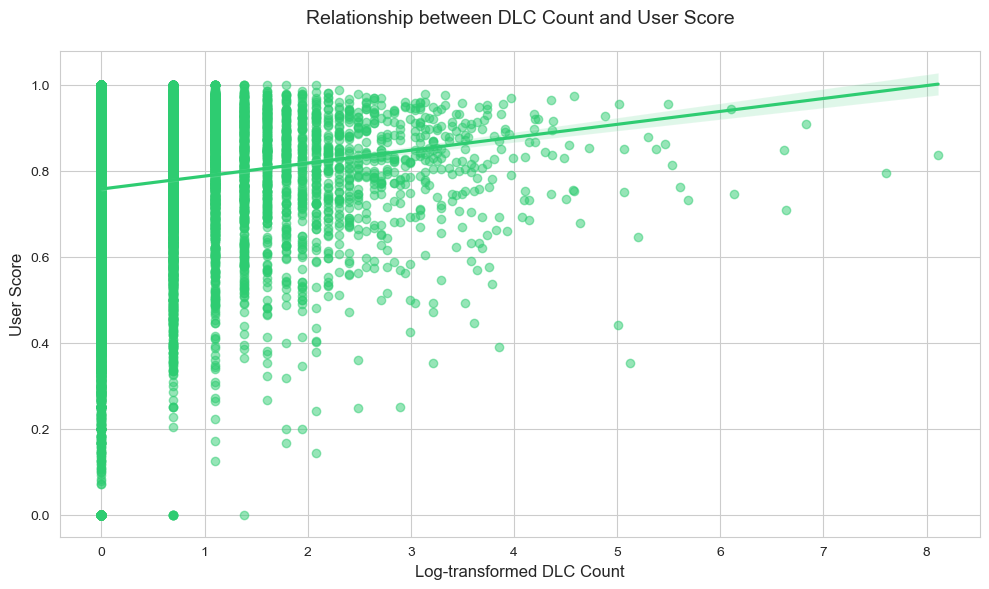

Correlation between log-transformed DLC count and user score: 0.11


In [216]:
# Create a scatter plot of dlc_count_log vs. userscore
plt.figure(figsize=(10, 6))
sns.regplot(x='dlc_count_log', y='userscore', data=processed_df, color='#2ecc71', scatter_kws={'alpha':0.5})
plt.xlabel('Log-transformed DLC Count', fontsize=12)
plt.ylabel('User Score', fontsize=12)
plt.title('Relationship between DLC Count and User Score', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = processed_df['dlc_count_log'].corr(processed_df['userscore'])
print(f"Correlation between log-transformed DLC count and user score: {correlation:.2f}")

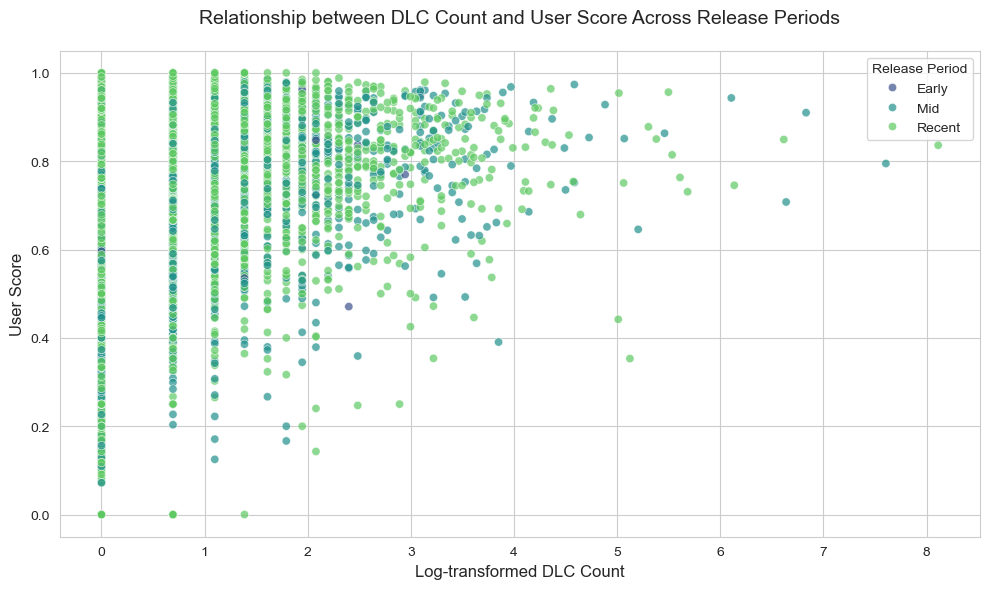

Correlation between log-transformed DLC count and user score for Early period: 0.02
Correlation between log-transformed DLC count and user score for Mid period: 0.16
Correlation between log-transformed DLC count and user score for Recent period: 0.09


In [217]:
# Categorize games into release periods
processed_df['release_period'] = pd.cut(processed_df['release_year'], bins=[0, 2010, 2018, float('Inf')], labels=['Early', 'Mid', 'Recent'], right=False)

# Create a scatter plot of dlc_count_log vs. userscore, colored by release period
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dlc_count_log', y='userscore', hue='release_period', data=processed_df, palette='viridis', alpha=0.7)
plt.xlabel('Log-transformed DLC Count', fontsize=12)
plt.ylabel('User Score', fontsize=12)
plt.title('Relationship between DLC Count and User Score Across Release Periods', fontsize=14, pad=20)
plt.legend(title='Release Period')
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient for each release period
for period in ['Early', 'Mid', 'Recent']:
    subset = processed_df[processed_df['release_period'] == period]
    correlation = subset['dlc_count_log'].corr(subset['userscore'])
    print(f"Correlation between log-transformed DLC count and user score for {period} period: {correlation:.2f}")

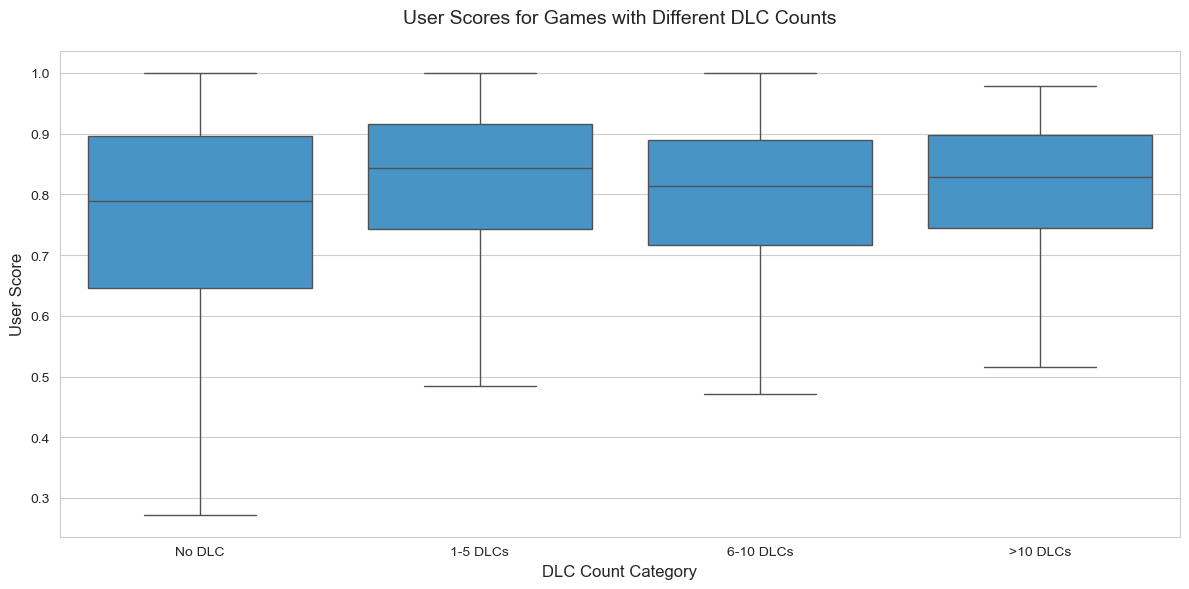

In [218]:
# Create box plots of user scores for different categories of dlc_count
processed_df['dlc_count_category'] = pd.cut(processed_df['dlc_count'], bins=[-1, 0, 5, 10, float('Inf')], labels=['No DLC', '1-5 DLCs', '6-10 DLCs', '>10 DLCs'], right=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='dlc_count_category', y='userscore', data=processed_df, color='#3498db', showfliers=False)
plt.xlabel('DLC Count Category', fontsize=12)
plt.ylabel('User Score', fontsize=12)
plt.title('User Scores for Games with Different DLC Counts', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

**Conclusions:**

* There is a slight positive trend between DLC count and user scores. The correlation coefficient is 0.11, indicating a weak positive relationship.
* The positive trend is observed across all time periods, but the strength of the correlation varies. The Mid period has a slightly stronger correlation (0.16) than the Early (0.02) and Recent (0.09) periods.
* The box plots show that the median user scores are relatively similar across different DLC categories. However, games with some DLC tend to have slightly higher median scores than games with no DLC. This could be due to the fact that games with DLC often have more content and features, which can lead to higher user satisfaction.
* **Overall, while DLC might contribute slightly to a game's perceived value, it's not a primary driver of high user scores.**


## **Question 4: What is the relationship between a game's price, its user score, and its commercial success (estimated by the number of owners)?**

**What are the benefits of finding the answer?**

* The findings can guide pricing decisions. Should developers price games higher if they expect higher user scores? Does a higher price correlate with higher sales (more owners)?
* Understanding the relationship can shed light on how users perceive the value of a game. Do higher-priced games need to have proportionally higher user scores to achieve similar commercial success?
* The analysis can reveal insights into the dynamics of the Steam market. How do price, user reception, and sales interact in this specific market?
* The relationships between these variables can be used to build models that predict a game's potential commercial success based on its price and user score.


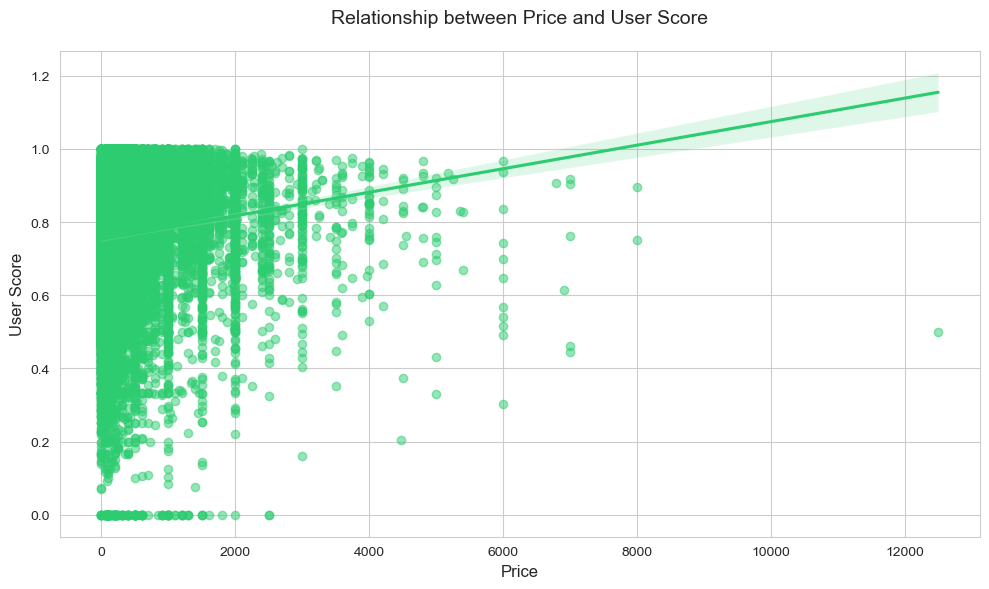

Correlation between price and user score: 0.12


In [219]:
# Create a scatter plot of price vs. userscore
plt.figure(figsize=(10, 6))
sns.regplot(x='price', y='userscore', data=processed_df, color='#2ecc71', scatter_kws={'alpha':0.5})
plt.xlabel('Price', fontsize=12)
plt.ylabel('User Score', fontsize=12)
plt.title('Relationship between Price and User Score', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = processed_df['price'].corr(processed_df['userscore'])
print(f"Correlation between price and user score: {correlation:.2f}")

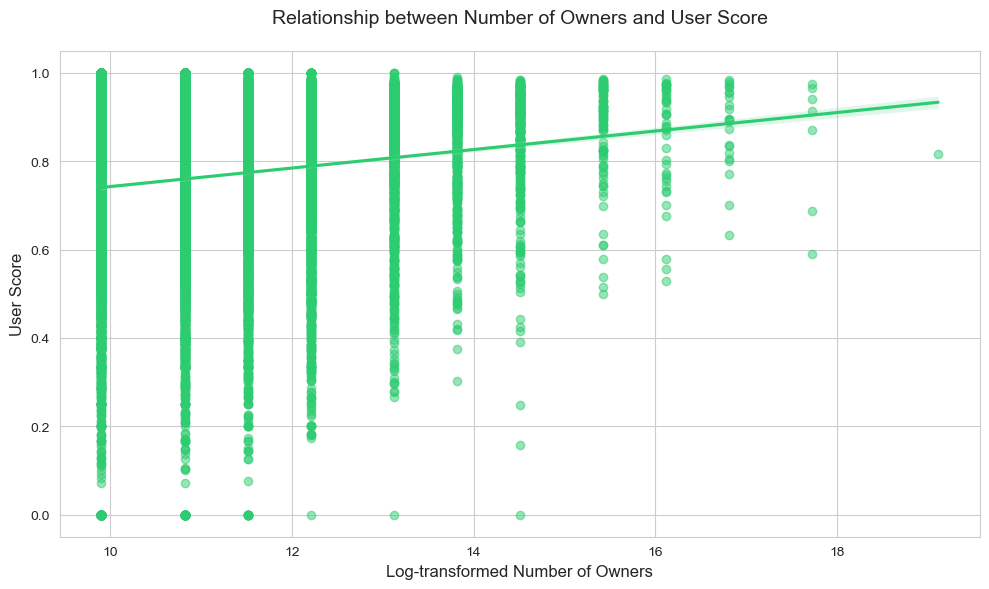

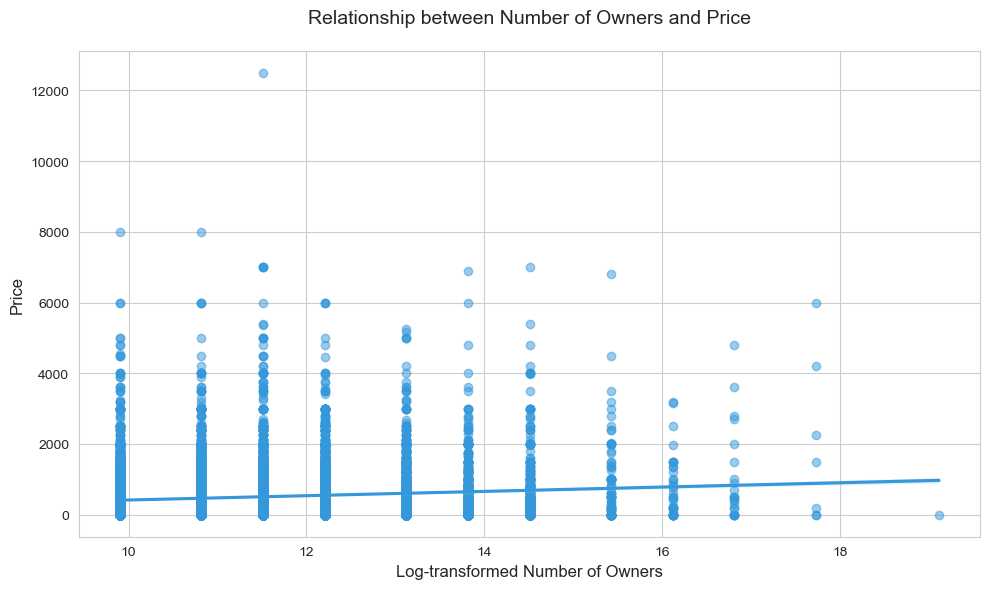

Correlation between log-transformed number of owners and user score: 0.14
Correlation between log-transformed number of owners and price: 0.11


In [220]:
# Create scatter plots of owners_log vs. userscore and owners_log vs. price
plt.figure(figsize=(10, 6))
sns.regplot(x='owners_log', y='userscore', data=processed_df, color='#2ecc71', scatter_kws={'alpha':0.5})
plt.xlabel('Log-transformed Number of Owners', fontsize=12)
plt.ylabel('User Score', fontsize=12)
plt.title('Relationship between Number of Owners and User Score', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='owners_log', y='price', data=processed_df, color='#3498db', scatter_kws={'alpha':0.5})
plt.xlabel('Log-transformed Number of Owners', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Relationship between Number of Owners and Price', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficients
correlation_owners_userscore = processed_df['owners_log'].corr(processed_df['userscore'])
correlation_owners_price = processed_df['owners_log'].corr(processed_df['price'])
print(f"Correlation between log-transformed number of owners and user score: {correlation_owners_userscore:.2f}")
print(f"Correlation between log-transformed number of owners and price: {correlation_owners_price:.2f}")

**Conclusion:**

There are weak positive correlations between price and user score, and between the number of owners and both price and user score. This suggests that slightly higher-priced games tend to have marginally better user ratings and somewhat more owners, and games with more owners also tend to be priced a bit higher and have slightly better scores. 

**However, these relationships are not strong, indicating that a high price doesn't guarantee a high user score or massive commercial success, and vice versa. Other factors likely play a more significant role.**



## **Question 5: How does the extent of a game's localization (number of supported languages) relate to its user score and its reach (estimated by the number of owners)?**

**What are the benefits of finding the answer?**

* The findings can inform decisions about localization. Does supporting more languages correlate with higher user scores or a broader reach (more owners)?
* Understanding the relationship can help developers tailor their games for a global audience. Which languages are most important to support?
* The analysis can provide insights into the potential return on investment for localization efforts.
*  The relationship between language support and user scores can reflect how important localization is to the overall user experience.


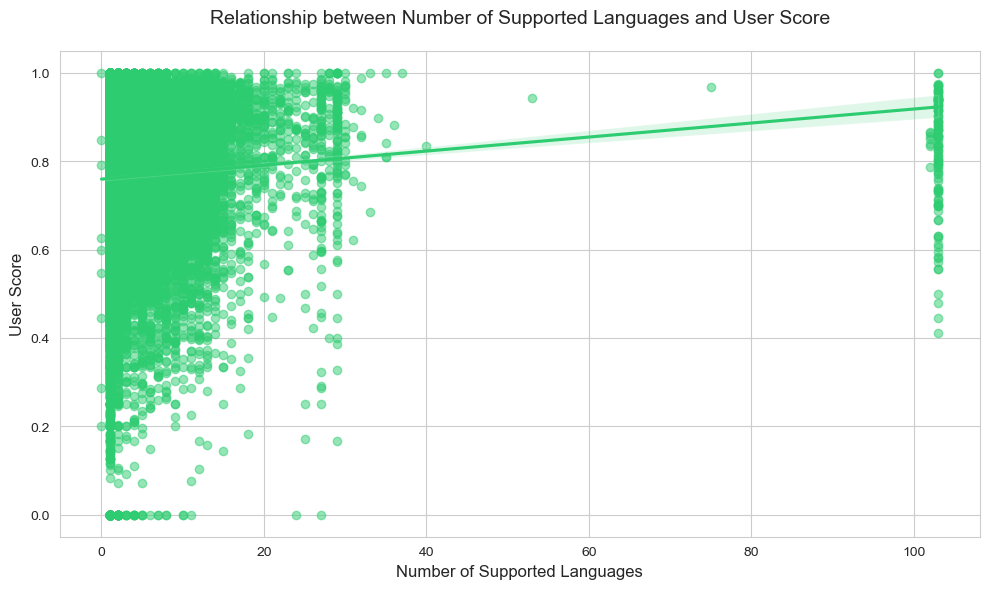

Correlation between number of supported languages and user score: 0.08


In [221]:
# Create a scatter plot of languages_count vs. userscore
plt.figure(figsize=(10, 6))
sns.regplot(x='languages_count', y='userscore', data=processed_df, color='#2ecc71', scatter_kws={'alpha':0.5})
plt.xlabel('Number of Supported Languages', fontsize=12)
plt.ylabel('User Score', fontsize=12)
plt.title('Relationship between Number of Supported Languages and User Score', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = processed_df['languages_count'].corr(processed_df['userscore'])
print(f"Correlation between number of supported languages and user score: {correlation:.2f}")

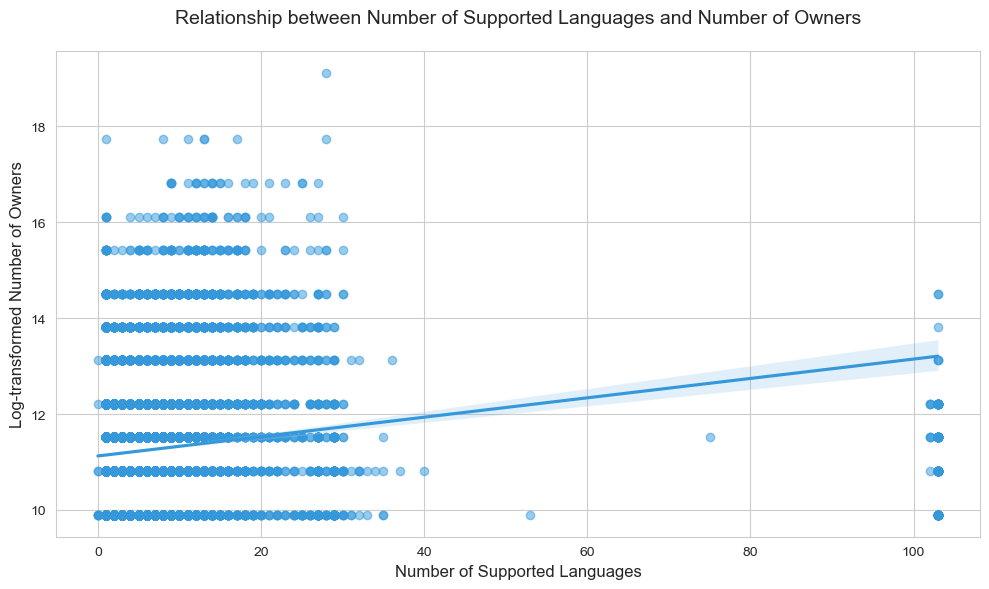

Correlation between number of supported languages and log-transformed number of owners: 0.15


In [222]:
# Create a scatter plot of languages_count vs. owners_log
plt.figure(figsize=(10, 6))
sns.regplot(x='languages_count', y='owners_log', data=processed_df, color='#3498db', scatter_kws={'alpha':0.5})
plt.xlabel('Number of Supported Languages', fontsize=12)
plt.ylabel('Log-transformed Number of Owners', fontsize=12)
plt.title('Relationship between Number of Supported Languages and Number of Owners', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = processed_df['languages_count'].corr(processed_df['owners_log'])
print(f"Correlation between number of supported languages and log-transformed number of owners: {correlation:.2f}")

**Conclusions:**

The extent of localization, as measured by the number of supported languages, has a very weak positive correlation with user scores. However, there's a more noticeable positive correlation between the number of supported languages and the number of owners. This suggests that while localizing a game might not significantly boost its user ratings, it does seem to contribute to reaching a wider audience and achieving greater commercial success. 

**Overall, localization appears to be more impactful for expanding a game's market reach than for directly influencing user sentiment.**



## **Question 6: How do user ratings vary across different game genres?**

**What are the benefits of finding the answer?**

* The findings can provide insights into the popularity and reception of different genres on Steam.
* Developers can use this information to make informed decisions about which genres to focus on.
* The analysis can reveal trends in player preferences and how they might be shifting over time.
* Understanding the average user scores for different genres can help developers manage player expectations.


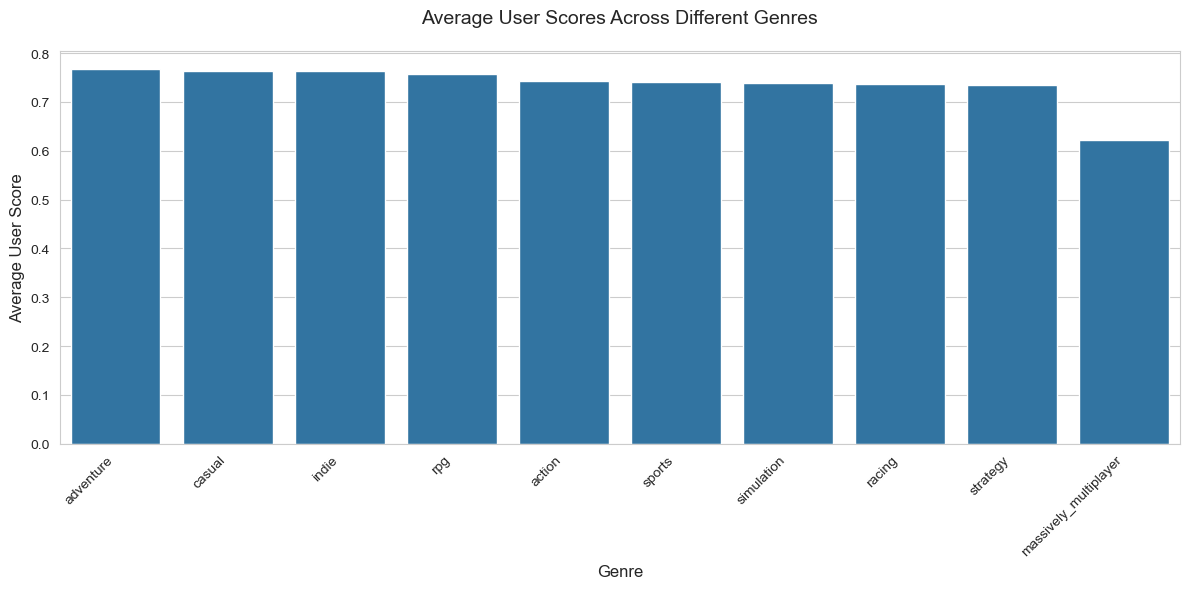

In [223]:
# Calculate the average user score for each genre
top_genres = ['indie', 'action', 'casual', 'adventure', 'simulation',
              'rpg', 'strategy', 'sports', 'racing', 'massively_multiplayer']
genre_scores = {}
for genre in top_genres:
    genre_mean = processed_df[processed_df[f'genre_{genre}'] == 1]['userscore'].mean()
    genre_scores[genre] = genre_mean

# Sort genres by average user score
sorted_genre_scores = dict(sorted(genre_scores.items(), key=lambda item: item[1], reverse=True))

# Create a bar plot of average user scores for each genre
plt.figure(figsize=(12, 6))
sns.barplot(x=list(sorted_genre_scores.keys()), y=list(sorted_genre_scores.values()))
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average User Score', fontsize=12)
plt.title('Average User Scores Across Different Genres', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


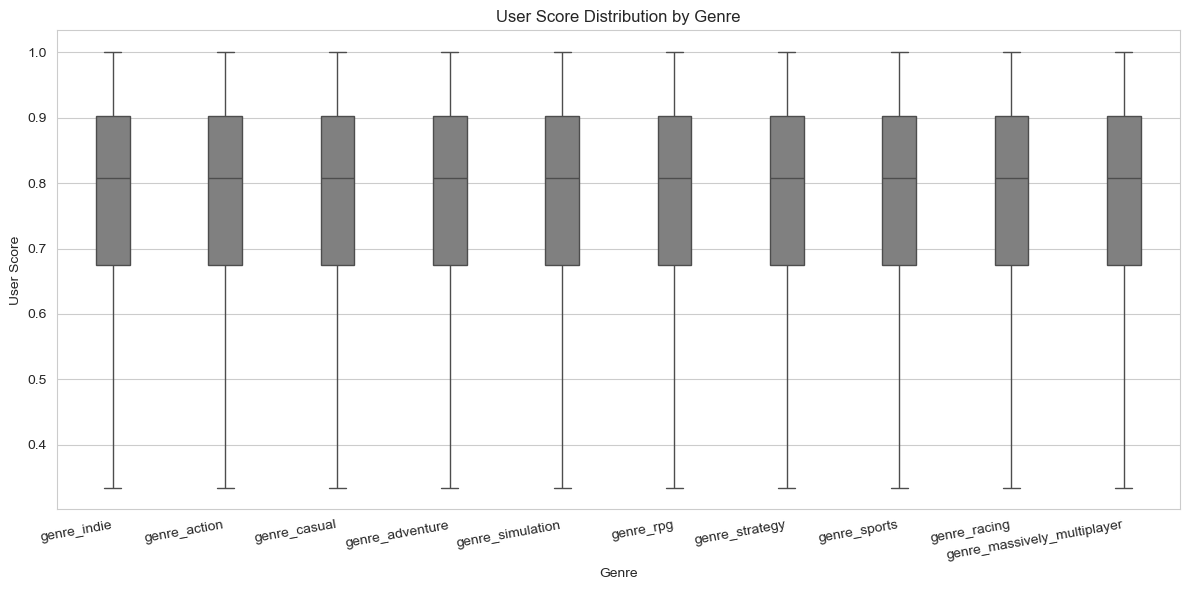

In [224]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='userscore', data=processed_df.melt(id_vars=['userscore'], 
                                                               value_vars=[f'genre_{genre}' for genre in top_genres],
                                                               var_name='genre', value_name='present'),
            color='gray', showfliers=False, width=0.3) 
plt.xticks(rotation=10, ha='right')
plt.xlabel('Genre')
plt.ylabel('User Score')
plt.title('User Score Distribution by Genre')
plt.tight_layout()
plt.show()


**Conclusions:**

Average user scores are fairly consistent across most game genres, with the exception of Massively Multiplayer games, which tend to have slightly lower average scores. The distribution of user scores within each genre is also quite similar. 

**Overall, genre appears to have a limited impact on user ratings, suggesting that quality and other factors are more influential in determining how well a game is received within its genre.**



## **Question 7: Which factors are the most influential in predicting user scores?**

**What are the benefits of finding the answer?**

* The findings can guide the development of predictive models for user scores.
* Understanding which features are most important can help developers focus on the aspects of game design that are most likely to influence user reception.
* Developers can prioritize their efforts based on the factors that have the strongest impact on user scores.
* The analysis provides data-driven insights into what drives user satisfaction on Steam.


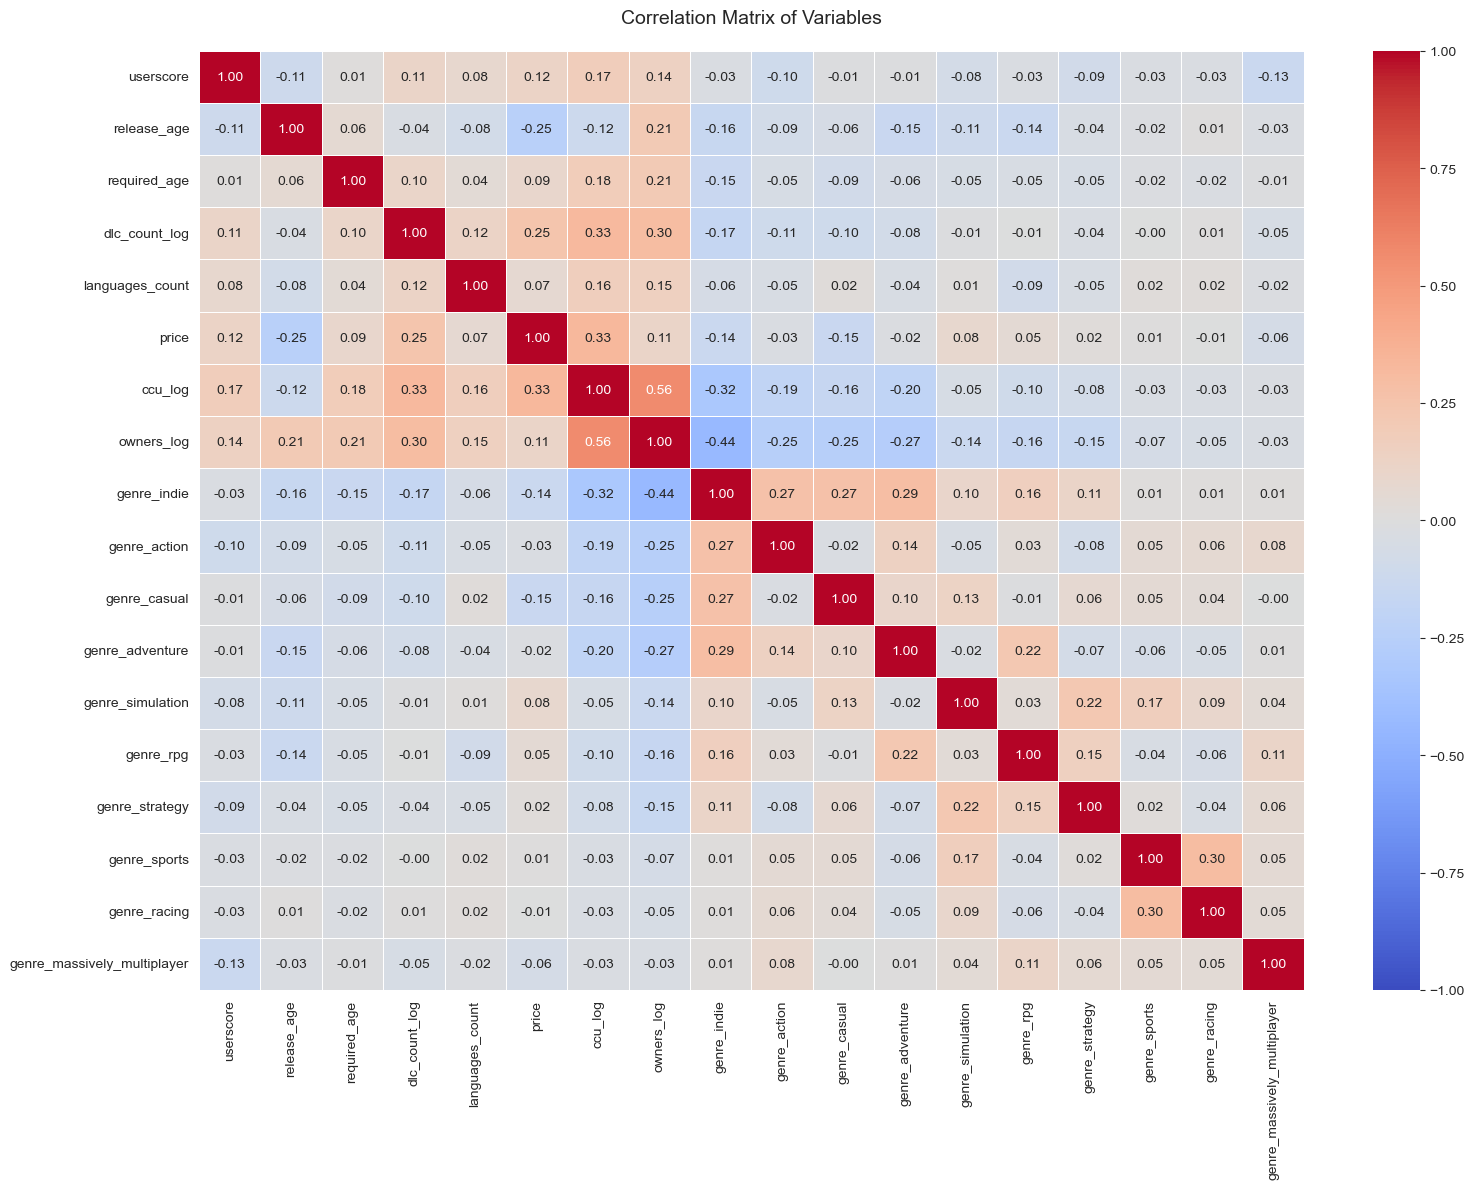


Correlations with Userscore:
userscore                      1.000000
ccu_log                        0.171921
owners_log                     0.144347
price                          0.118189
dlc_count_log                  0.113006
languages_count                0.083800
required_age                   0.012035
genre_adventure               -0.008847
genre_casual                  -0.014541
genre_sports                  -0.028845
genre_racing                  -0.030885
genre_indie                   -0.030936
genre_rpg                     -0.031235
genre_simulation              -0.075111
genre_strategy                -0.089444
genre_action                  -0.103471
release_age                   -0.111565
genre_massively_multiplayer   -0.134781
Name: userscore, dtype: float64


In [225]:
# Create a correlation matrix including all relevant variables
correlation_matrix = processed_df[['userscore', 'release_age', 'required_age', 'dlc_count_log', 'languages_count', 'price', 'ccu_log', 'owners_log'] + [f'genre_{g}' for g in top_genres]].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Variables', fontsize=14, pad=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print correlation values with userscore
correlations_with_userscore = correlation_matrix['userscore'].sort_values(ascending=False)
print("\nCorrelations with Userscore:")
print(correlations_with_userscore)

--- Linear Regression ---
MSE: 0.0308
RMSE: 0.1754
R2: 0.0836
NMSE: 0.9164
--- L2 Regression (Ridge) ---
MSE: 0.0308
RMSE: 0.1754
R2: 0.0836
NMSE: 0.9164
--- Decision Tree ---
MSE: 0.0544
RMSE: 0.2333
R2: -0.6209
NMSE: 1.6209
--- Random Forest ---
MSE: 0.0292
RMSE: 0.1707
R2: 0.1316
NMSE: 0.8684
--- Gradient Boosting ---
MSE: 0.0270
RMSE: 0.1643
R2: 0.1960
NMSE: 0.8040
--- K-Nearest Neighbors ---
MSE: 0.0322
RMSE: 0.1793
R2: 0.0422
NMSE: 0.9578


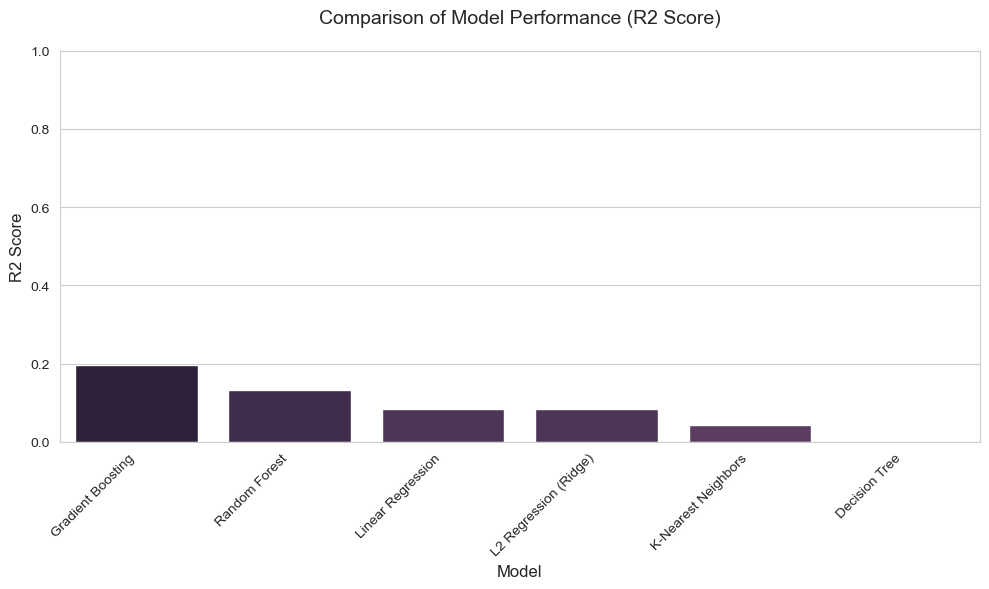


Model Comparison (Sorted by R2 Score):
                            MSE      RMSE        R2      NMSE
Gradient Boosting      0.026989  0.164284  0.196024  0.803976
Random Forest          0.029152  0.170738  0.131615  0.868385
Linear Regression      0.030763  0.175393  0.083625  0.916375
L2 Regression (Ridge)  0.030763  0.175393  0.083624  0.916376
K-Nearest Neighbors    0.032154  0.179315  0.042184  0.957816
Decision Tree          0.054412  0.233265 -0.620868  1.620868


In [229]:
X = processed_df[['release_age', 'required_age', 'dlc_count_log', 'languages_count', 'price', 'ccu_log', 'owners_log'] + [f'genre_{g}' for g in top_genres]]
y = processed_df['userscore']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'L2 Regression (Ridge)': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    nmse = mse / np.var(y_test)

    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'NMSE': nmse
    }

    print(f"--- {name} ---")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2: {r2:.4f}")
    print(f"NMSE: {nmse:.4f}")

# DataFrame to compare model performance
results_df = pd.DataFrame(results).T

# Sort DataFrame by R2 score in descending order
results_df = results_df.sort_values('R2', ascending=False)

# Create a bar chart of R2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R2', data=results_df, hue='R2',legend=False)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.title('Comparison of Model Performance (R2 Score)', fontsize=14, pad=20)
plt.ylim(0, 1)  
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the sorted results table
print("\nModel Comparison (Sorted by R2 Score):")
print(results_df)

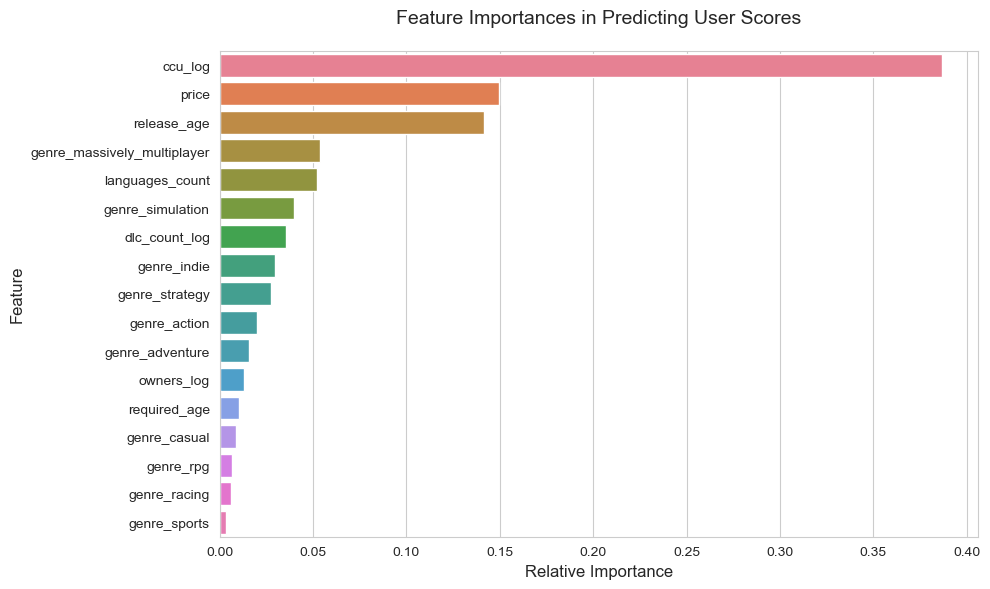

In [230]:
# param_grid = {
#     'n_estimators': [100, 200, 300],  
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5], 
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.8, 0.9, 1.0]
# }

# # Create a Gradient Boosting model
# gb_model = GradientBoostingRegressor(random_state=0)

# # Perform GridSearchCV to find the best hyperparameter combination
# grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='r2', cv=2, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# Best Hyperparameters for Gradient Boosting:
# {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.9}

# Get the best model
best_gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth = 4, min_samples_leaf = 4, min_samples_split = 2, random_state=0)
best_gb_model.fit(X_train, y_train)
# Print the best hyperparameters
# print("\nBest Hyperparameters for Gradient Boosting:")
# print(grid_search.best_params_)

# Get feature importances from the best model
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': best_gb_model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Create a feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances, hue='feature',legend=False)
plt.xlabel('Relative Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importances in Predicting User Scores', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


**Conclusions:**

The feature importance plot from the Gradient Boosting model reveals that `ccu_log` (concurrent users) followed by `price` and `release_age` are the most important features in predicting user scores.
While several factors show some correlation with user scores, the Gradient Boosting model identifies concurrent player count (ccu_log) and its price as the most important predictors. 

This implies that games with a higher number of concurrent players tend to receive higher user ratings, possibly reflecting a positive feedback loop where popular games attract more players and positive reviews. The importance of `price` might indicate that users associate higher prices with higher quality or that games with higher production values (and thus potentially higher prices) tend to be better received. Developers should pay close attention to factors that contribute to a healthy concurrent player base and consider the potential impact of pricing on user perception. While `release_age` also plays a role, it is slightly less influential than `price` in this model.
